## Libraires

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')   

### Data Loading

In [54]:
cars_df=pd.read_csv('cars_price.csv')
cars_df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,NaN,mpfi,3.47,2.68,9.0,111,NaN,21.0,27.0,13495
1,3.0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111,NaN,21.0,27.0,16500
2,1.0,?,alfa-romero,gas,std,two,hatchback,rwd,NaN,94.5,...,152.0,mpfi,NaN,3.47,9.0,154,NaN,19.0,26.0,16500
3,2.0,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,NaN,10.0,102,5500,24.0,30.0,13950
4,2.0,164,audi,gas,std,NaN,sedan,4wd,front,99.4,...,136.0,mpfi,NaN,3.4,8.0,115,5500,18.0,22.0,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30325,3.0,150,mazda,gas,std,two,hatchback,rwd,front,95.3,...,80.0,mpfi,NaN,NaN,9.4,135,NaN,NaN,NaN,15645
30326,NaN,168,toyota,gas,std,two,hatchback,rwd,front,94.5,...,98.0,mpfi,3.24,NaN,9.4,112,6600,26.0,29.0,9538
30327,1.0,113,mazda,gas,std,four,sedan,fwd,front,93.1,...,91.0,2bbl,3.03,NaN,9.0,68,5000,31.0,38.0,6695
30328,3.0,186,porsche,gas,std,NaN,hatchback,rwd,front,94.5,...,151.0,mpfi,3.94,NaN,9.5,143,5500,19.0,27.0,22018


## 1. EDA

#### Basic Info about the Data

In [55]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30330 entries, 0 to 30329
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          27286 non-null  float64
 1   normalized-losses  27294 non-null  object 
 2   make               27228 non-null  object 
 3   fuel-type          27309 non-null  object 
 4   aspiration         27355 non-null  object 
 5   num-of-doors       27321 non-null  object 
 6   body-style         27326 non-null  object 
 7   drive-wheels       27215 non-null  object 
 8   engine-location    27352 non-null  object 
 9   wheel-base         27264 non-null  float64
 10  length             27258 non-null  float64
 11  width              27387 non-null  float64
 12  height             27281 non-null  float64
 13  curb-weight        27302 non-null  float64
 14  engine-type        27285 non-null  object 
 15  num-of-cylinders   27298 non-null  object 
 16  engine-size        272

#### Checking Nans

In [56]:
cars_df.isna().sum()

symboling            3044
normalized-losses    3036
make                 3102
fuel-type            3021
aspiration           2975
num-of-doors         3009
body-style           3004
drive-wheels         3115
engine-location      2978
wheel-base           3066
length               3072
width                2943
height               3049
curb-weight          3028
engine-type          3045
num-of-cylinders     3032
engine-size          3059
fuel-system          3081
bore                 2957
stroke               2921
compression-ratio    3003
horsepower           3148
peak-rpm             2999
city-mpg             3101
highway-mpg          3027
price                3043
dtype: int64

#### Data Type of Columns

In [57]:
categorical_columns=cars_df.select_dtypes(include='object').columns
categorical_columns

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
       'peak-rpm', 'price'],
      dtype='object')

In [58]:
numeric_columns= cars_df.select_dtypes(include='float64').columns
numeric_columns

Index(['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight',
       'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg'],
      dtype='object')

#### Changing Some Columns Data Type

In [59]:
def change_type(column_name,new_type):
    cars_df[column_name]=cars_df[column_name].replace('?',np.nan)
    cars_df[column_name]=cars_df[column_name].astype(new_type)

In [60]:
change_type('normalized-losses','float64')
change_type('price','float64')
change_type('stroke','float64')
change_type('bore','float64')
change_type('horsepower','float64')
change_type('peak-rpm','float64')

In [61]:
cars_df['num-of-doors']=cars_df['num-of-doors'].replace('?',np.nan)

In [62]:
number_words = {
    'zero': 0, 'one': 1, 'two': 2, 'three': 3, 'four': 4,
    'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10, 'eleven': 11, 'twelve': 12
}

def words_to_int(x):
    if pd.isna(x):
        return np.nan
    return number_words.get(str(x).lower(), np.nan)  # Returns NaN if word not found

cars_df['num-of-doors'] = cars_df['num-of-doors'].apply(words_to_int)
cars_df['num-of-cylinders'] = cars_df['num-of-cylinders'].apply(words_to_int)

In [63]:
numeric_columns= cars_df.select_dtypes(include='float64').columns
numeric_columns

Index(['symboling', 'normalized-losses', 'num-of-doors', 'wheel-base',
       'length', 'width', 'height', 'curb-weight', 'num-of-cylinders',
       'engine-size', 'bore', 'stroke', 'compression-ratio', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')

In [64]:
categorical_columns=cars_df.select_dtypes(include='object').columns
categorical_columns

Index(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'fuel-system'],
      dtype='object')

### Statistical Summary & Distribution

In [65]:
cars_df[numeric_columns].describe()

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,27286.000000,21768.000000,27061.000000,27264.000000,27258.000000,27387.000000,27281.000000,27302.000000,27298.000000,27271.000000,26842.000000,26877.000000,27327.000000,26922.000000,27081.000000,27229.000000,27303.000000,26724.000000
mean,0.839075,122.348447,3.130187,98.807875,174.158302,65.918114,53.732059,2560.265988,4.389516,127.322834,3.330761,3.256885,10.128243,104.631342,5121.598168,25.158507,30.709885,13235.159145
std,1.239600,35.466905,0.991508,6.037800,12.366150,2.143679,2.438541,522.483478,1.084672,41.863332,0.271512,0.316256,3.943566,39.771595,478.959908,6.517298,6.862626,7954.952152
min,-2.000000,65.000000,2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.000000,2.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,4.000000,97.000000,3.150000,3.110000,8.500000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,115.000000,4.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,4.000000,102.400000,183.500000,66.900000,55.500000,2954.000000,4.000000,146.000000,3.590000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.000000,4.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


#### Histogram for Numerical Features

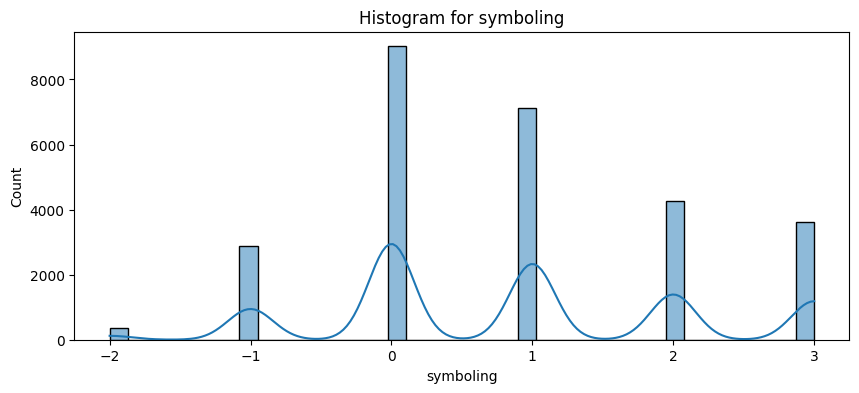

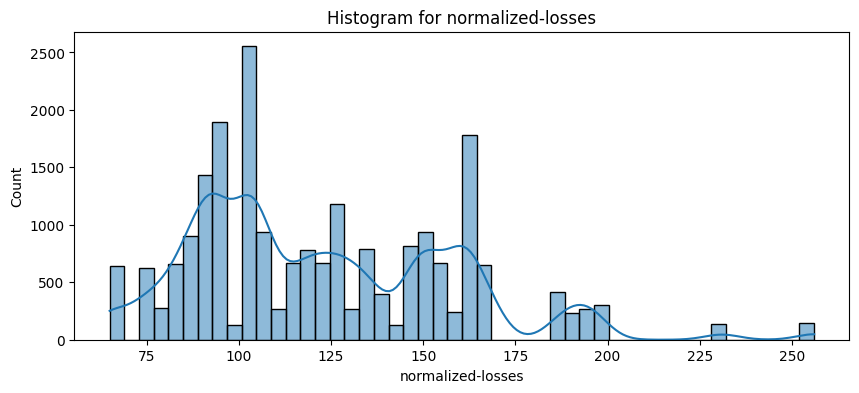

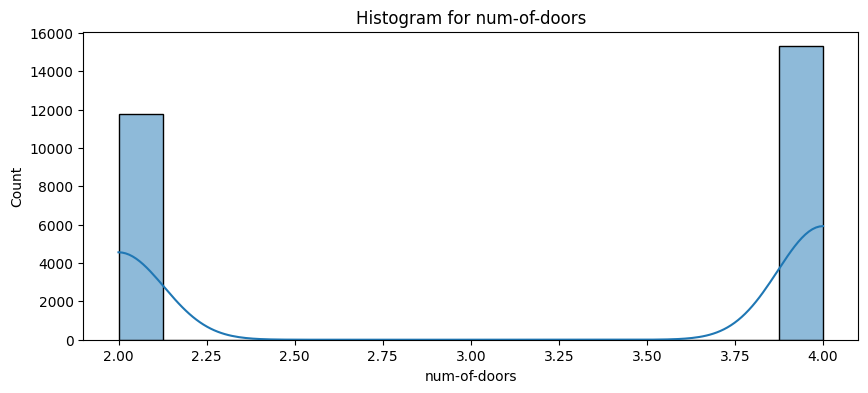

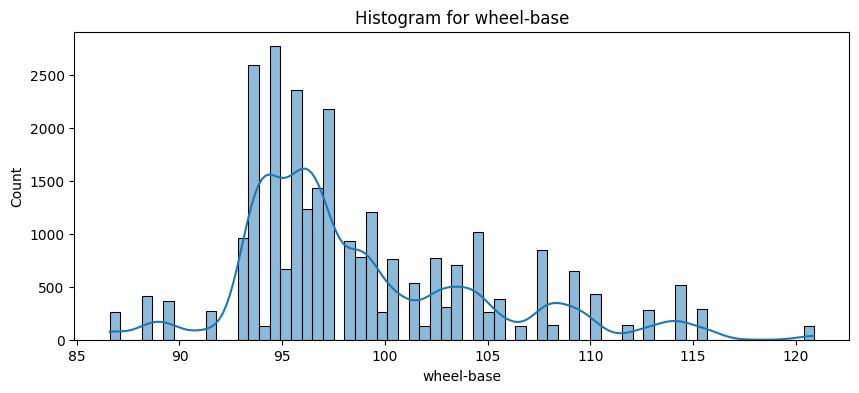

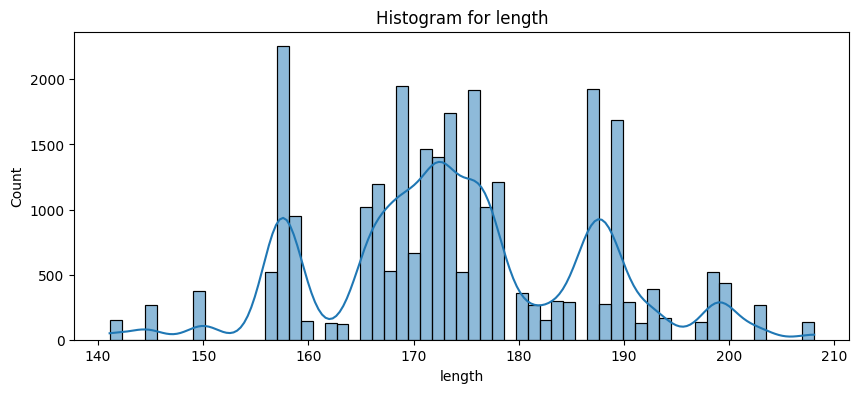

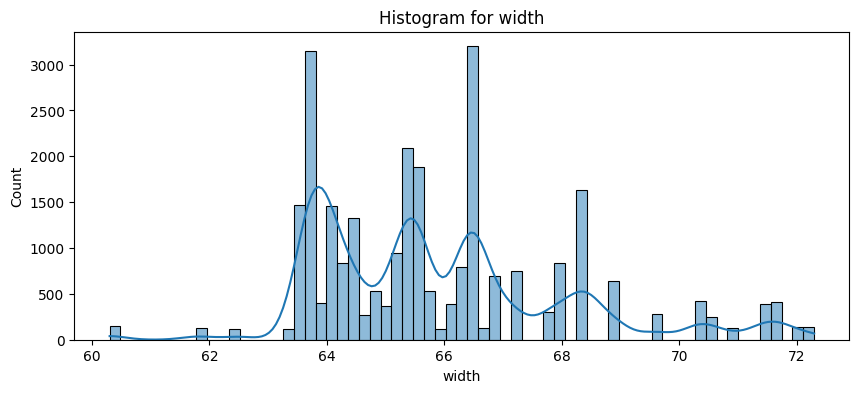

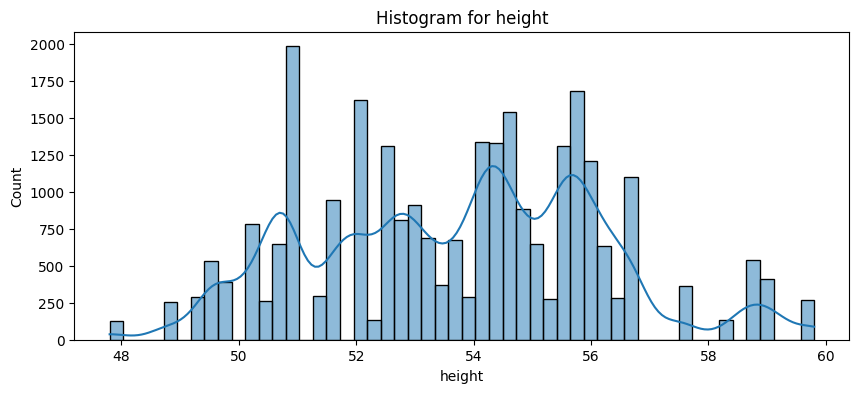

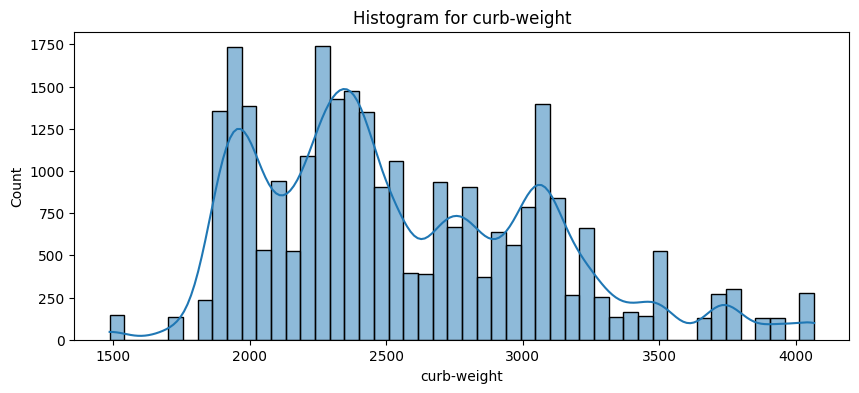

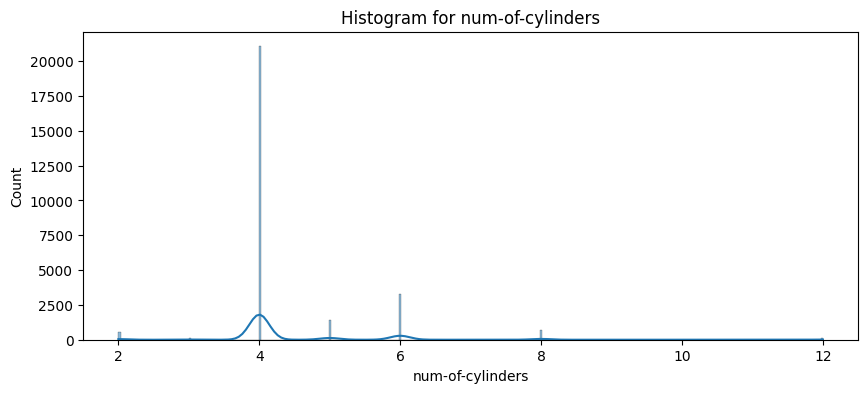

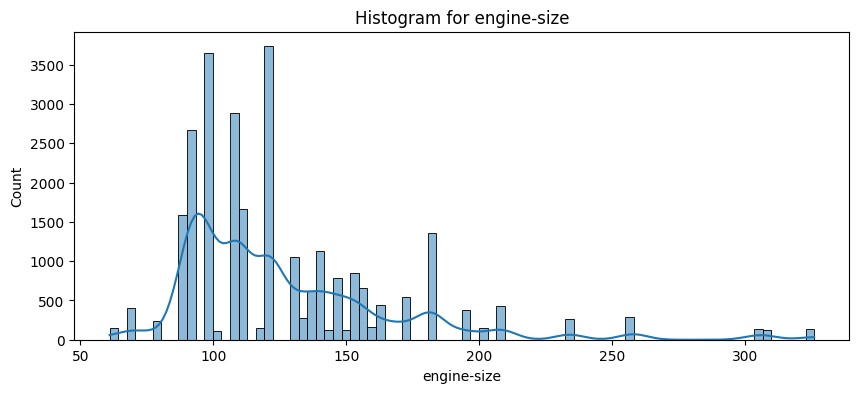

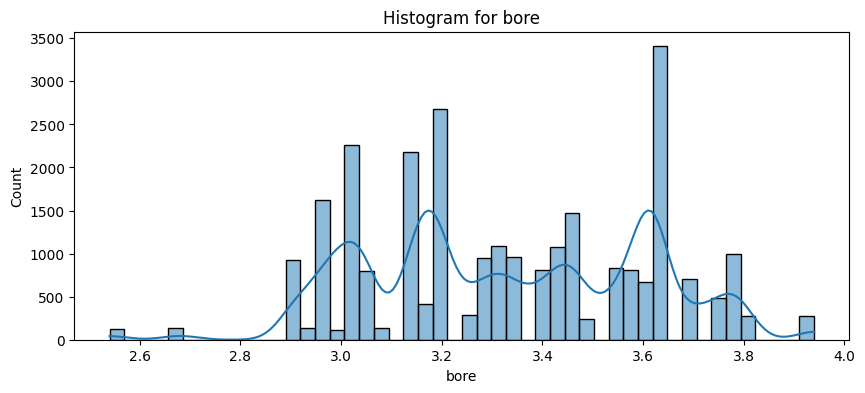

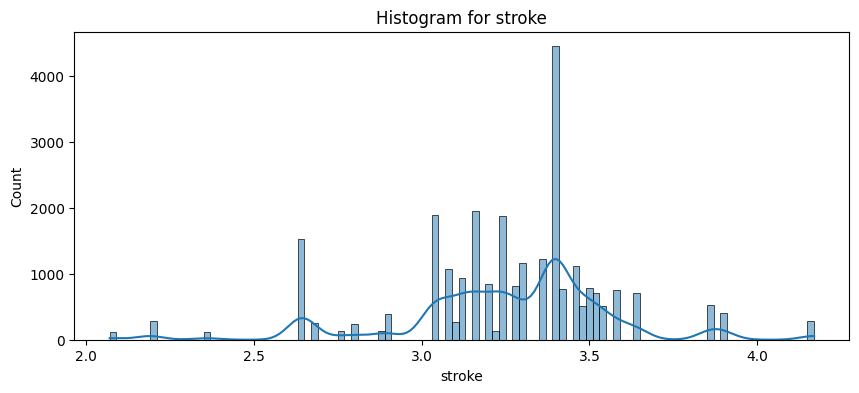

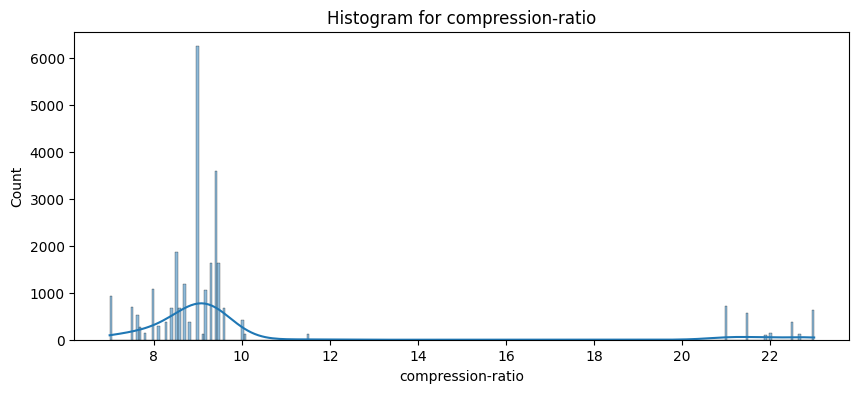

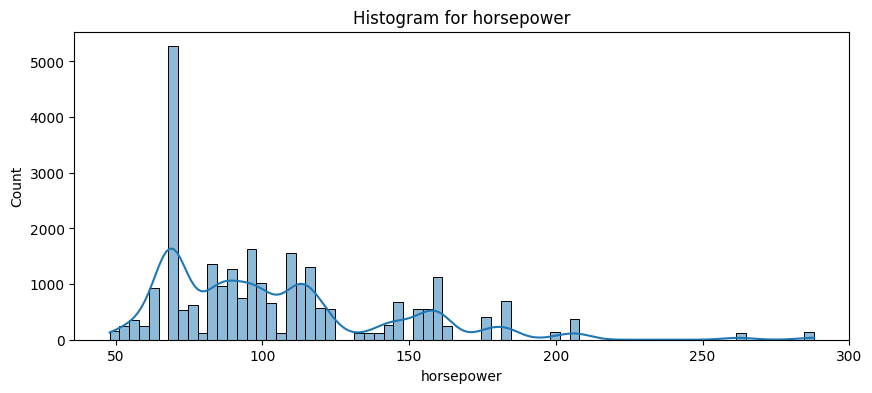

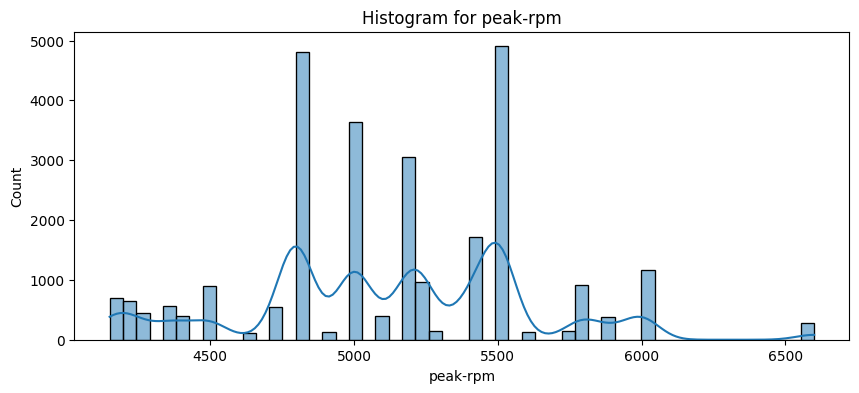

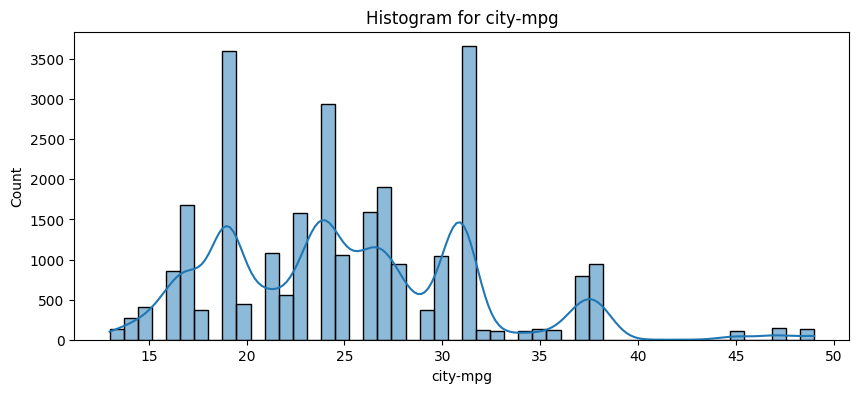

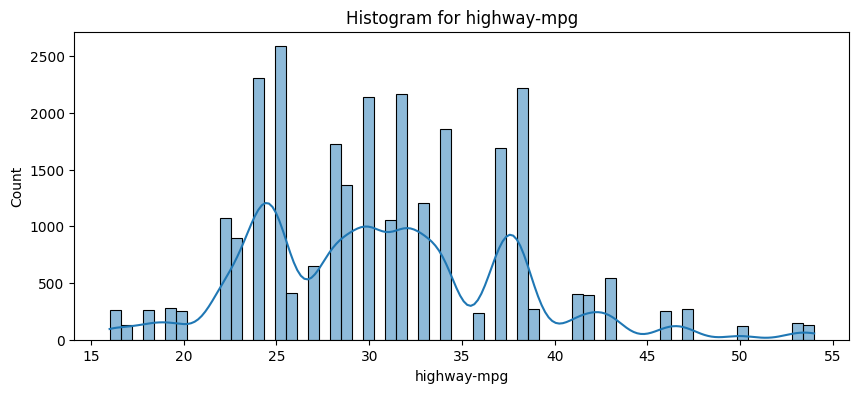

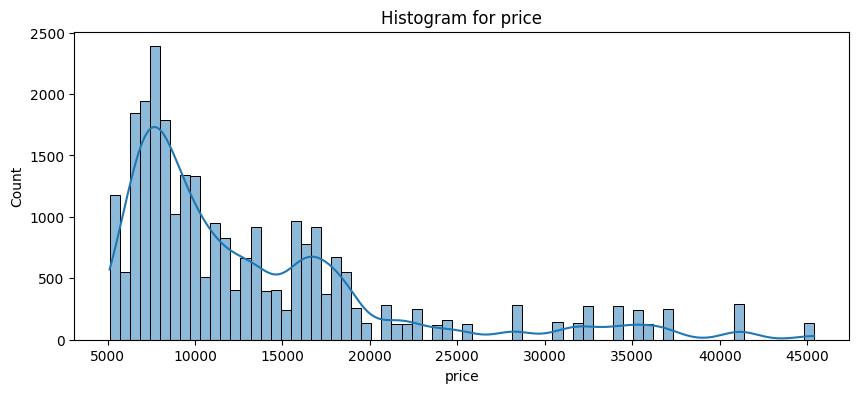

In [66]:
for cols in numeric_columns:
    plt.figure(figsize=(10,4))
    sns.histplot(data=cars_df,x=cols  ,kde=True)
    plt.title('Histogram for '+cols)
    plt.show()

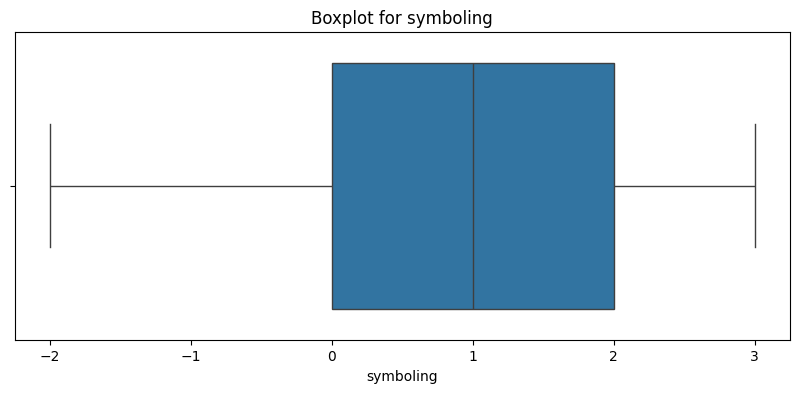

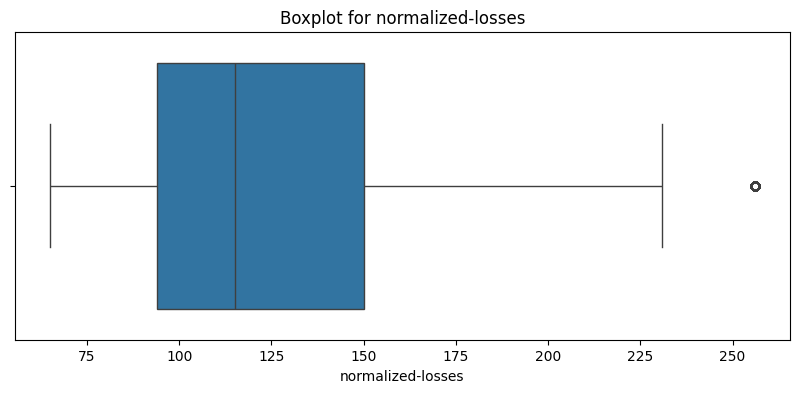

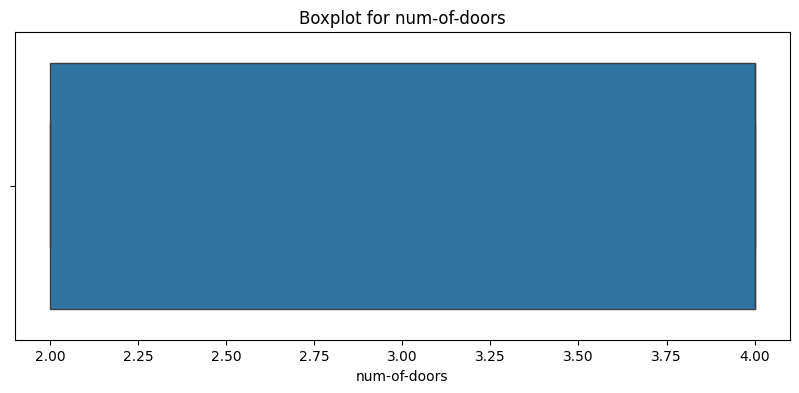

In [67]:
for cols in numeric_columns[:3]:
    plt.figure(figsize=(10,4))
    sns.boxplot(data=cars_df,x=cols)
    plt.title('Boxplot for '+cols)
    plt.show()

#### Relationships Between Features

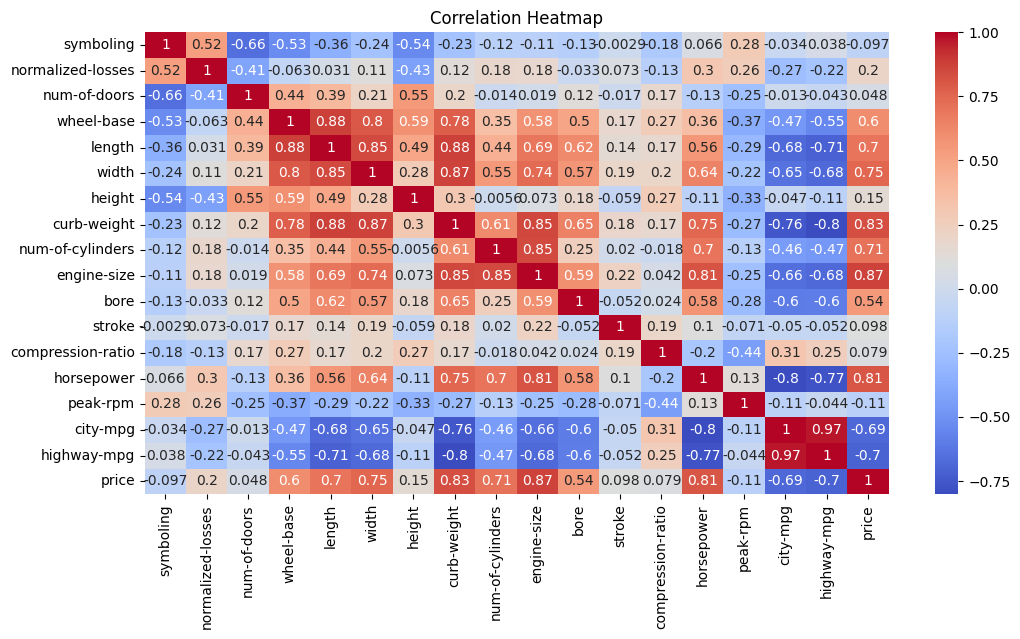

In [68]:
correlation= cars_df[numeric_columns].corr()

plt.figure(figsize=(12,6))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Text(0.5, 1.0, 'Average Price by Fuel Type')

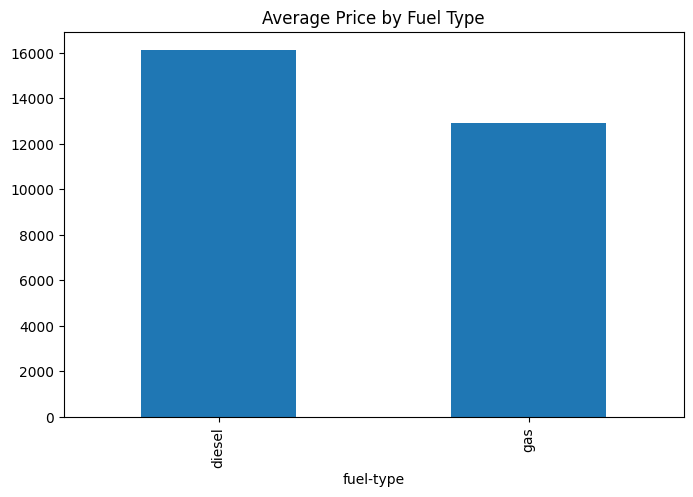

In [69]:
avg_fuel_price= cars_df.pivot_table(values='price',index='fuel-type',aggfunc='mean')
avg_fuel_price.plot(kind='bar',figsize=(8,5),legend=False)
plt.title('Average Price by Fuel Type')

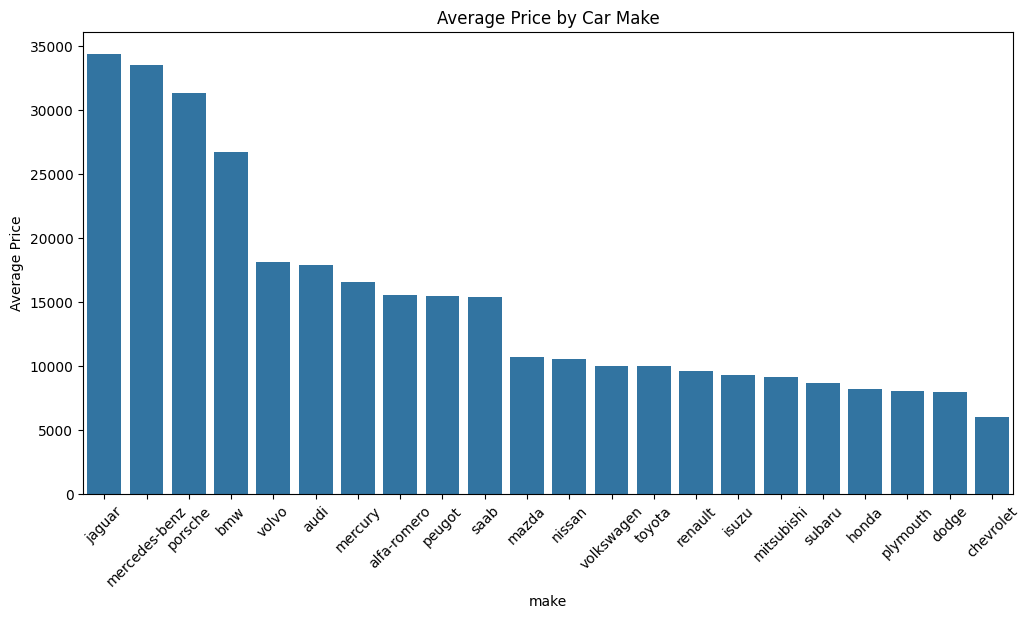

In [70]:
# Calculate average price by car make
avg_price = cars_df.groupby('make')['price'].mean().sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(12,6))
sns.barplot(x=avg_price.index, y=avg_price.values)
plt.xticks(rotation=45)  
plt.ylabel('Average Price')
plt.title('Average Price by Car Make')
plt.show()


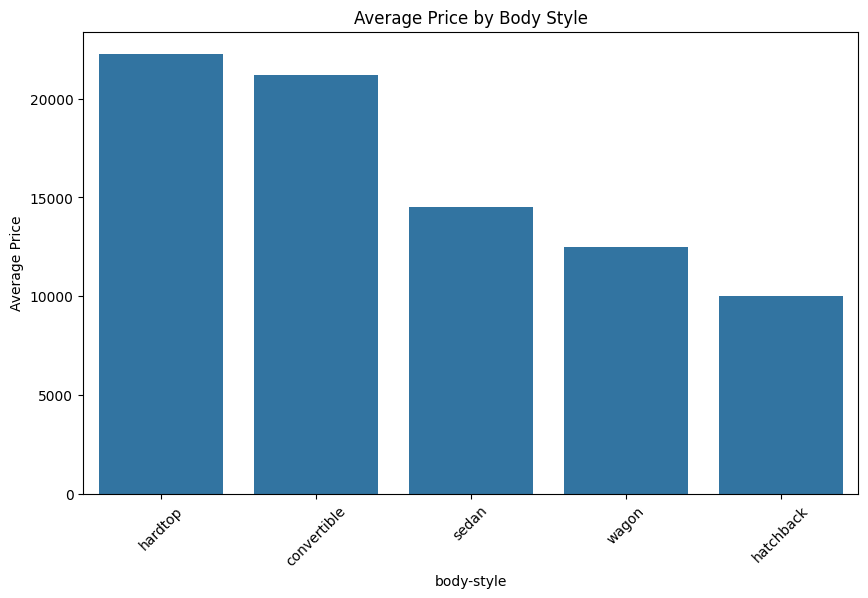

In [71]:
avg_price_body = cars_df.groupby('body-style')['price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_price_body.index, y=avg_price_body.values)
plt.xticks(rotation=45) 
plt.ylabel('Average Price')
plt.title('Average Price by Body Style')
plt.show()


The most common engine type is: ohc


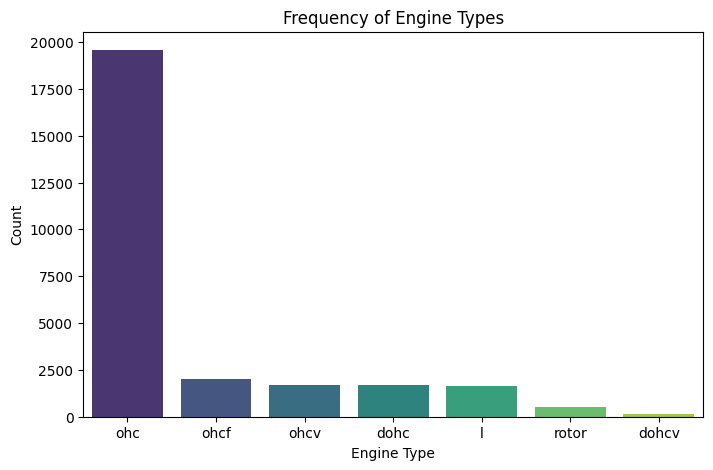

In [72]:
engine_counts = cars_df['engine-type'].value_counts()
most_common_engine = engine_counts.idxmax()
print(f"The most common engine type is: {most_common_engine}")

# Plot a bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=engine_counts.index, y=engine_counts.values, palette="viridis")
plt.title("Frequency of Engine Types")
plt.xlabel("Engine Type")
plt.ylabel("Count")
plt.show()

## 2. Data Preprocessing

#### Missing Values

In [73]:
missing_data = cars_df.isna().sum()
missing_percentage = (missing_data / len(cars_df)) * 100
missing_summary = pd.DataFrame({'Missing Count': missing_data, 'Missing %': missing_percentage})
print("Columns with missing values:\n", missing_summary[missing_summary['Missing Count'] > 0])


Columns with missing values:
                    Missing Count  Missing %
symboling                   3044  10.036268
normalized-losses           8562  28.229476
make                        3102  10.227498
fuel-type                   3021   9.960435
aspiration                  2975   9.808770
num-of-doors                3269  10.778107
body-style                  3004   9.904385
drive-wheels                3115  10.270359
engine-location             2978   9.818661
wheel-base                  3066  10.108803
length                      3072  10.128586
width                       2943   9.703264
height                      3049  10.052753
curb-weight                 3028   9.983515
engine-type                 3045  10.039565
num-of-cylinders            3032   9.996703
engine-size                 3059  10.085724
fuel-system                 3081  10.158259
bore                        3488  11.500165
stroke                      3453  11.384768
compression-ratio           3003   9.901088
ho

#### Filling nans
##### Numeric Columns with median where data is skewed and where data is discrete we use Mode.
##### Categorical Columns will be filled with Mode

In [74]:
num_cols = cars_df.select_dtypes(include=np.number).columns
for col in num_cols:
    if col != 'num-of-doors' and col != 'num-of-cylinders' and col !='symboling': ## Num of doors, symboling and cylinders are discrete so we will use mode
        if cars_df[col].isna().sum() > 0:
            cars_df[col].fillna(cars_df[col].median(), inplace=True)

In [75]:
def fillna_discrete(column_name):
    if cars_df[column_name].isna().sum() > 0:
        cars_df[column_name]=cars_df[column_name].fillna(cars_df[column_name].mode()[0])
        
        
fillna_discrete('num-of-doors')
fillna_discrete('num-of-cylinders') 
fillna_discrete('symboling')

In [76]:
cat_cols = cars_df.select_dtypes(include='object').columns
for col in cat_cols:
    if cars_df[col].isna().sum() > 0:
        cars_df[col].fillna(cars_df[col].mode()[0], inplace=True)

In [77]:
print("\nAny remaining missing values?")
print(cars_df.isna().sum())


Any remaining missing values?
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


### Encoding Categorical Features
#### First we will check whether we have to apply one hot encoding or Label Encoding after printing the unqiue and number of unique values

In [78]:
categorical_columns

Index(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'fuel-system'],
      dtype='object')

In [79]:
print(f"{'Column':20} | {'#Unique Values':15} | Unique Values")
print("-"*70)

for col in categorical_columns:
    print(f"{col:20} | {cars_df[col].nunique():15} | {list(cars_df[col].unique())}")

Column               | #Unique Values  | Unique Values
----------------------------------------------------------------------
make                 |              22 | ['alfa-romero', 'audi', 'toyota', 'bmw', 'chevrolet', 'dodge', 'honda', 'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury', 'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault', 'saab', 'subaru', 'volkswagen', 'volvo']
fuel-type            |               2 | ['gas', 'diesel']
aspiration           |               2 | ['std', 'turbo']
body-style           |               5 | ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop']
drive-wheels         |               3 | ['rwd', 'fwd', '4wd']
engine-location      |               2 | ['front', 'rear']
engine-type          |               7 | ['dohc', 'ohc', 'ohcv', 'l', 'rotor', 'ohcf', 'dohcv']
fuel-system          |               8 | ['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi']


##### All of the columns are of Nominal Type no ordering so we will do One hot encoding. Except Make column although its Nominal but has alot of unique values so its impractical to careate 22 columns via One hot encoding as it will lead to sparse matrix and feature explosion.

#### One Hot Encoding

In [80]:
ohe= OneHotEncoder(sparse_output=False, drop='first')

In [81]:
## applying one hot encoding on all columns except make as it has too many unique values
cat_df = cars_df[categorical_columns[1:]]

encoded_array= ohe.fit_transform(cat_df)

encoded_cols = ohe.get_feature_names_out(categorical_columns[1:])

encoded_df = pd.DataFrame(encoded_array,columns=encoded_cols)

encoded_df.index = cars_df.index


In [82]:
encoded_df

,fuel-type_gas,aspiration_turbo,body-style_hardtop,body-style_hatchback,body-style_sedan,body-style_wagon,drive-wheels_fwd,drive-wheels_rwd,engine-location_rear,engine-type_dohcv,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30325,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30326,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30327,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
30328,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Label Encoding

In [83]:
le = LabelEncoder()
cars_df['make_encoded'] = le.fit_transform(cars_df['make'])

#### Concatenationg to Original Df

In [84]:
cars_df=cars_df.drop(columns=categorical_columns,axis=1)

In [85]:
cars_df

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,make_encoded
0,3.0,115.0,2.0,88.6,168.8,64.1,54.1,2548.0,4.0,120.0,3.47,2.68,9.0,111.0,5200.0,21.0,27.0,13495.0,0
1,3.0,115.0,2.0,88.6,168.8,64.1,48.8,2548.0,4.0,130.0,3.47,2.68,9.0,111.0,5200.0,21.0,27.0,16500.0,0
2,1.0,115.0,2.0,94.5,171.2,65.5,52.4,2823.0,6.0,152.0,3.31,3.47,9.0,154.0,5200.0,19.0,26.0,16500.0,0
3,2.0,164.0,4.0,99.8,176.6,66.2,54.3,2337.0,4.0,109.0,3.19,3.29,10.0,102.0,5500.0,24.0,30.0,13950.0,1
4,2.0,164.0,4.0,99.4,173.2,65.5,54.3,2824.0,5.0,136.0,3.31,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30325,3.0,150.0,2.0,95.3,169.0,65.7,49.6,2500.0,2.0,80.0,3.31,3.29,9.4,135.0,5200.0,24.0,30.0,15645.0,8
30326,0.0,168.0,2.0,94.5,168.7,64.0,52.6,2300.0,4.0,98.0,3.24,3.29,9.4,112.0,6600.0,26.0,29.0,9538.0,19
30327,1.0,113.0,4.0,93.1,166.8,64.2,54.1,1945.0,4.0,91.0,3.03,3.29,9.0,68.0,5000.0,31.0,38.0,6695.0,8
30328,3.0,186.0,4.0,94.5,168.9,65.5,50.2,2778.0,4.0,151.0,3.94,3.29,9.5,143.0,5500.0,19.0,27.0,22018.0,15


In [86]:
cars_df=pd.concat([cars_df,encoded_df],axis=1)

In [87]:
cars_df

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3.0,115.0,2.0,88.6,168.8,64.1,54.1,2548.0,4.0,120.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.0,115.0,2.0,88.6,168.8,64.1,48.8,2548.0,4.0,130.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,115.0,2.0,94.5,171.2,65.5,52.4,2823.0,6.0,152.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.0,164.0,4.0,99.8,176.6,66.2,54.3,2337.0,4.0,109.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.0,164.0,4.0,99.4,173.2,65.5,54.3,2824.0,5.0,136.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30325,3.0,150.0,2.0,95.3,169.0,65.7,49.6,2500.0,2.0,80.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30326,0.0,168.0,2.0,94.5,168.7,64.0,52.6,2300.0,4.0,98.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30327,1.0,113.0,4.0,93.1,166.8,64.2,54.1,1945.0,4.0,91.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
30328,3.0,186.0,4.0,94.5,168.9,65.5,50.2,2778.0,4.0,151.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Feature Scaling & Selection

In [88]:
cars_df[numeric_columns[:-1]].describe().T[['min','max']]

,min,max
symboling,-2.00,3.00
normalized-losses,65.00,256.00
num-of-doors,2.00,4.00
wheel-base,86.60,120.90
length,141.10,208.10
width,60.30,72.30
height,47.80,59.80
curb-weight,1488.00,4066.00
num-of-cylinders,2.00,12.00
engine-size,61.00,326.00


In [89]:
#### These are the feature columns that need to be scaled they have varying ranges
features_to_scale = [
    'normalized-losses','wheel-base','length','width','height',
    'curb-weight','engine-size','bore','stroke','compression-ratio',
    'horsepower','peak-rpm','city-mpg','highway-mpg'
]


scaler = MinMaxScaler()
cars_df[features_to_scale] = scaler.fit_transform(cars_df[features_to_scale])

In [90]:
cars_df

,symboling,normalized-losses,num-of-doors,wheel-base,length,width,height,curb-weight,num-of-cylinders,engine-size,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3.0,0.261780,2.0,0.058309,0.413433,0.316667,0.525000,0.411171,4.0,0.222642,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3.0,0.261780,2.0,0.058309,0.413433,0.316667,0.083333,0.411171,4.0,0.260377,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.261780,2.0,0.230321,0.449254,0.433333,0.383333,0.517843,6.0,0.343396,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2.0,0.518325,4.0,0.384840,0.529851,0.491667,0.541667,0.329325,4.0,0.181132,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2.0,0.518325,4.0,0.373178,0.479104,0.433333,0.541667,0.518231,5.0,0.283019,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30325,3.0,0.445026,2.0,0.253644,0.416418,0.450000,0.150000,0.392552,2.0,0.071698,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30326,0.0,0.539267,2.0,0.230321,0.411940,0.308333,0.400000,0.314973,4.0,0.139623,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30327,1.0,0.251309,4.0,0.189504,0.383582,0.325000,0.525000,0.177269,4.0,0.113208,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
30328,3.0,0.633508,4.0,0.230321,0.414925,0.433333,0.200000,0.500388,4.0,0.339623,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [91]:
correlation = cars_df[numeric_columns].corr()
price_corr = correlation['price'].sort_values(ascending=False)
display(price_corr)

price                1.000000
engine-size          0.762272
curb-weight          0.729870
horsepower           0.661226
width                0.641442
length               0.621123
num-of-cylinders     0.595260
wheel-base           0.535267
bore                 0.477957
height               0.136370
stroke               0.088321
normalized-losses    0.082767
compression-ratio    0.070575
num-of-doors         0.042358
symboling           -0.081680
peak-rpm            -0.107056
city-mpg            -0.595241
highway-mpg         -0.615324
Name: price, dtype: float64

In [92]:
### These columns have very low correlation with price so we can drop them
cars_df=cars_df.drop(columns=['height','stroke','normalized-losses','compression-ratio','num-of-doors','symboling'])
cars_df

,wheel-base,length,width,curb-weight,num-of-cylinders,engine-size,bore,horsepower,peak-rpm,city-mpg,...,engine-type_ohcf,engine-type_ohcv,engine-type_rotor,fuel-system_2bbl,fuel-system_4bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,0.058309,0.413433,0.316667,0.411171,4.0,0.222642,0.664286,0.262500,0.428571,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.058309,0.413433,0.316667,0.411171,4.0,0.260377,0.664286,0.262500,0.428571,0.222222,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.230321,0.449254,0.433333,0.517843,6.0,0.343396,0.550000,0.441667,0.428571,0.166667,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.384840,0.529851,0.491667,0.329325,4.0,0.181132,0.464286,0.225000,0.551020,0.305556,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.373178,0.479104,0.433333,0.518231,5.0,0.283019,0.550000,0.279167,0.551020,0.138889,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30325,0.253644,0.416418,0.450000,0.392552,2.0,0.071698,0.550000,0.362500,0.428571,0.305556,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30326,0.230321,0.411940,0.308333,0.314973,4.0,0.139623,0.500000,0.266667,1.000000,0.361111,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
30327,0.189504,0.383582,0.325000,0.177269,4.0,0.113208,0.350000,0.083333,0.346939,0.500000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
30328,0.230321,0.414925,0.433333,0.500388,4.0,0.339623,1.000000,0.395833,0.551020,0.166667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Splitting Data

#### It's very important to keep a seperate test set so we can evaluate our model on unseen data.

In [ ]:
target=cars_df['price']
cars_df=cars_df.drop(columns=['price'],axis=1)

X_train, X_test, y_train, y_test= train_test_split(cars_df,target,test_size=0.2,random_state=42,shuffle=True)

## 3. Model Building

#### Linear Regressor

In [105]:
lin_reg= LinearRegression()
lin_reg.fit(X_train,y_train)

y_pred_lr= lin_reg.predict(X_test)

mae_lr= mean_absolute_error(y_test,y_pred_lr)
mse_lr= mean_squared_error(y_test,y_pred_lr)
r2_lr= r2_score(y_test,y_pred_lr)

print(f"Linear Regression Performance:\nMAE: {mae_lr}\nMSE: {mse_lr}\nR2 Score: {r2_lr}")

Linear Regression Performance:
MAE: 2328.9746779682596
MSE: 13982886.284351824
R2 Score: 0.7508538926308186


#### Decision Tree Regressor

In [103]:
dt_regressor= DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train,y_train)
y_pred_dt= dt_regressor.predict(X_test)

mae_dt= mean_absolute_error(y_test,y_pred_dt)
mse_dt= mean_squared_error(y_test,y_pred_dt)

r2_dt= r2_score(y_test,y_pred_dt)

print(f"Decision Tree Regressor Performance:\nMAE: {mae_dt}\nMSE: {mse_dt}\nR2 Score: {r2_dt}")

Decision Tree Regressor Performance:
MAE: 1157.7068871169997
MSE: 10686297.55165848
R2 Score: 0.8095922842364772
